<a href="https://colab.research.google.com/github/Udaykbhilme/CODSOFT/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Load the Iris dataset
data = pd.read_csv('IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Preview the data
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# Analyze species distribution
species_count = data['species'].value_counts().reset_index()
print(species_count)

           species  count
0      Iris-setosa     50
1  Iris-versicolor     50
2   Iris-virginica     50


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


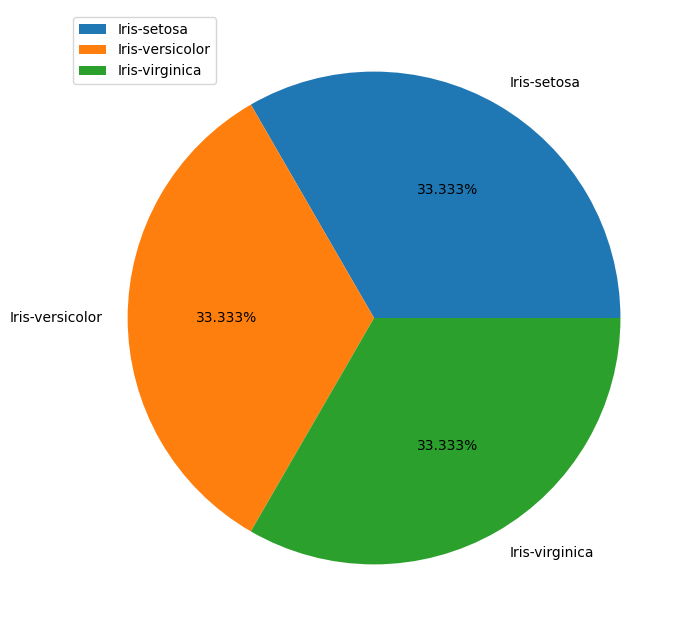

In [ ]:
# Analyze species distribution
species_count = data['species'].value_counts() # Remove reset_index()
print(species_count)

# Visualize species distribution with a pie chart
plt.figure(figsize=(8,8))
plt.pie(species_count.values, labels=species_count.index, autopct='%1.3f%%') # Use .values and .index
plt.legend(loc='upper left')
plt.show()

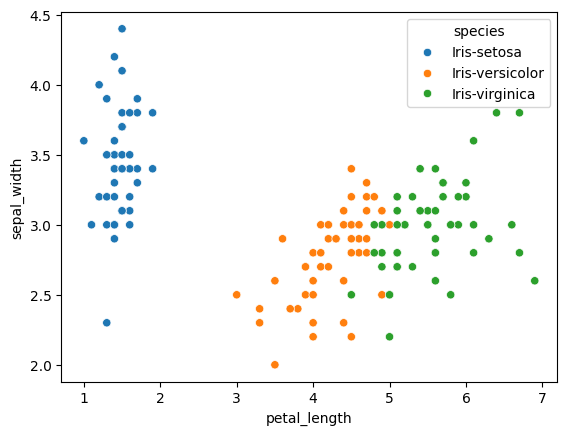

In [ ]:
sns.scatterplot(data=data, x='petal_length', y='sepal_width', hue='species')
plt.show()

In [ ]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# Show value counts for species
print(data['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
# Prepare features and target
features = data.drop(columns='species')
target = data['species']

In [ ]:
# Standardize the feature data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
# Encode species labels
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)

In [ ]:
# Convert target labels to one-hot encoding
target_onehot = tf.keras.utils.to_categorical(target_encoded)

In [ ]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target_onehot, test_size=0.10, random_state=101)

In [ ]:
# Define model parameters
input_dim = x_train.shape[1]
batch_size = 10
hidden1_units = 100
hidden2_units = 50
output_units = 3
epochs = 70

In [ ]:
# Build the neural network model
model = Sequential([
    Dense(hidden1_units, input_dim=input_dim, activation='relu'),
    Dense(hidden2_units, activation='relu'),
    Dense(output_units, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               500       
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 5703 (22.28 KB)
Trainable params: 5703 (22.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/70
14/14 [==============================] - 1s 2ms/step - loss: 1.0008 - accuracy: 0.6148
Epoch 2/70
14/14 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.8667
Epoch 3/70
14/14 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.8444
Epoch 4/70
14/14 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8222
Epoch 5/70
14/14 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8370
Epoch 6/70
14/14 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8667
Epoch 7/70
14/14 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.8889
Epoch 8/70
14/14 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.8963
Epoch 9/70
14/14 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9111
Epoch 10/70
14/14 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9333
Epoch 11/70
14/14 [

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 154ms/step - loss: 0.0489 - accuracy: 1.0000
Test Accuracy: 1.0000
